c:\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


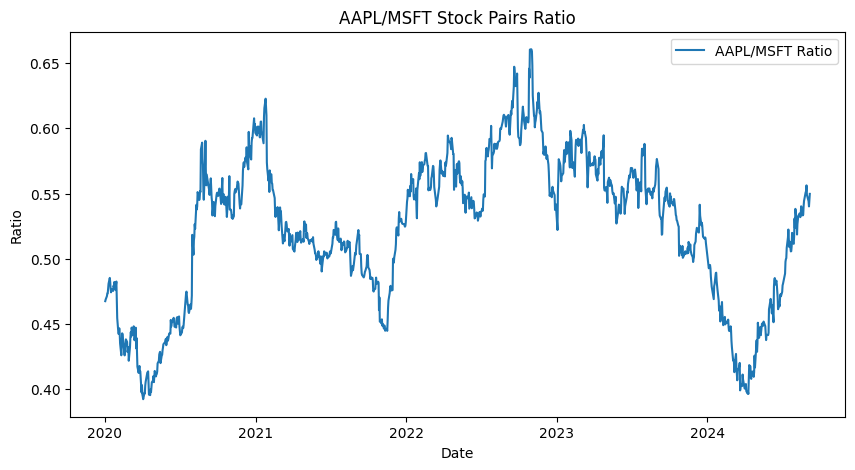

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# getting historical data
stock_a = yf.download("AAPL", start="2020-01-01", end="2024-09-09")
stock_b = yf.download("MSFT", start="2020-01-01", end="2024-09-09")

# calculate stock pair ratio
stock_a['Ratio'] = stock_a['Close'] / stock_b['Close']

# ploting stock ratio
plt.figure(figsize=(10, 5))
plt.plot(stock_a['Ratio'], label="AAPL/MSFT Ratio")
plt.title('AAPL/MSFT Stock Pairs Ratio')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()

In [ ]:
# 20-day moving average for ratio
stock_a['Ratio_MA_20'] = stock_a['Ratio'].rolling(window=20).mean()

# RSI for the ratio
def compute_RSI(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

stock_a['Ratio_RSI'] = compute_RSI(stock_a['Ratio'])

